An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


First example: Basic autoencoder

Define an autoencoder with two Dense layers: an encoder, which compresses the images into a 64 dimensional latent vector, and a decoder, that reconstructs the original image from the latent space.

tf.math.reduce_prod
Reduces a tensor by multiplying all its elements.
If shape is a tensor with multiple elements, reduce_prod multiplies them together.

In [4]:
# shape = tf.constant([2, 3, 4])  # Shape of a tensor
# num_elements = tf.math.reduce_prod(shape)
# print(num_elements.numpy())

# 24

In [3]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Train the model using x_train as both the input and the target. The encoder will learn to compress the dataset from 784 dimensions to the latent space, and the decoder will learn to reconstruct the original images. .

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0396 - val_loss: 0.0132
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0123 - val_loss: 0.0108
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0087 - val_loss: 0.0088


In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [8]:
encoded_imgs

array([[2.1471899 , 2.671574  , 2.5331783 , ..., 3.4728856 , 1.5122603 ,
        0.7010807 ],
       [1.488288  , 0.69332016, 2.8868904 , ..., 1.957519  , 2.279603  ,
        3.0643826 ],
       [2.464057  , 3.5200212 , 3.0117674 , ..., 2.5897727 , 1.74703   ,
        3.198317  ],
       ...,
       [1.5954576 , 1.1934094 , 0.71449006, ..., 2.6338773 , 3.0829568 ,
        3.238294  ],
       [2.5724144 , 3.0819142 , 2.064074  , ..., 2.4821815 , 1.6933687 ,
        5.2605557 ],
       [3.2289762 , 2.254499  , 1.7145977 , ..., 1.6260526 , 1.2839115 ,
        0.726009  ]], dtype=float32)

In [9]:
decoded_imgs

array([[[2.47426385e-07, 1.47314253e-07, 1.50180381e-06, ...,
         3.79558696e-05, 6.22946175e-07, 1.64146670e-07],
        [5.06425806e-07, 8.10237054e-07, 4.13732960e-05, ...,
         2.38389382e-03, 2.25143987e-04, 8.67471272e-07],
        [2.35768439e-05, 1.18590615e-05, 5.94869653e-06, ...,
         4.68896469e-03, 2.37964885e-03, 3.54394688e-05],
        ...,
        [3.27364163e-04, 1.66847982e-04, 6.47982757e-04, ...,
         6.89437962e-04, 4.79630864e-04, 9.85701336e-05],
        [6.44877073e-05, 1.31436927e-05, 1.20282166e-04, ...,
         8.02338473e-05, 1.00907899e-04, 1.98612797e-05],
        [1.50618121e-06, 1.55162470e-05, 1.37116967e-05, ...,
         1.20617886e-04, 1.82781747e-04, 4.61367199e-06]],

       [[6.25385432e-09, 7.69207253e-10, 7.86838115e-08, ...,
         3.71029523e-06, 8.91648444e-09, 1.02129138e-09],
        [7.14708515e-09, 2.89312077e-08, 3.69609334e-05, ...,
         6.55728101e-04, 1.12715141e-04, 4.21315178e-08],
        [9.91217561e-08, 

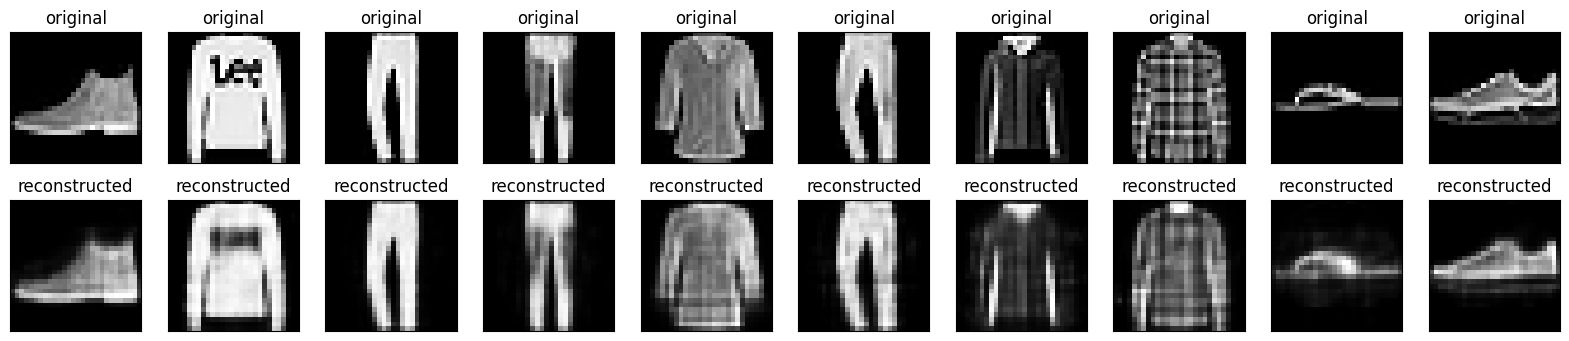

In [10]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Second example: Image denoising

An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

In [11]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [15]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

Adding random noise to the images

In [13]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) # return tensor 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [14]:
x_train_noisy

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[0.        ],
         [0.08226431],
         [0.34945452],
         ...,
         [0.        ],
         [0.3150425 ],
         [0.13661595]],

        [[0.        ],
         [0.00190129],
         [0.        ],
         ...,
         [0.        ],
         [0.04479271],
         [0.        ]],

        [[0.19791248],
         [0.190147  ],
         [0.        ],
         ...,
         [0.02827137],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.14755867],
         ...,
         [0.00639123],
         [0.19284116],
         [0.        ]],

        [[0.19731437],
         [0.        ],
         [0.00186441],
         ...,
         [0.04797916],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00688526],
         ...,
         [0.120206  ],
         [0.        ],
         [0.2493174 ]]],




In [16]:
x_train_noisy

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[0.        ],
         [0.08226431],
         [0.34945452],
         ...,
         [0.        ],
         [0.3150425 ],
         [0.13661595]],

        [[0.        ],
         [0.00190129],
         [0.        ],
         ...,
         [0.        ],
         [0.04479271],
         [0.        ]],

        [[0.19791248],
         [0.190147  ],
         [0.        ],
         ...,
         [0.02827137],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.14755867],
         ...,
         [0.00639123],
         [0.19284116],
         [0.        ]],

        [[0.19731437],
         [0.        ],
         [0.00186441],
         ...,
         [0.04797916],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00688526],
         ...,
         [0.120206  ],
         [0.        ],
         [0.2493174 ]]],




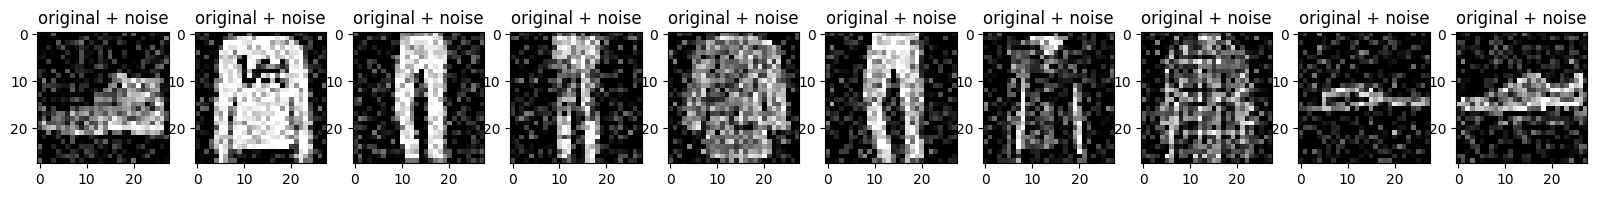

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i])) # tensor to numpy array
    plt.gray()
plt.show()

Define a convolutional autoencoder
In this example, you will train a convolutional autoencoder using Conv2D layers in the encoder, and Conv2DTranspose layers in the decoder

In [19]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [20]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [21]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0372 - val_loss: 0.0102
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0077 - val_loss: 0.0076


In [23]:
autoencoder.summary()

Model: "denoise"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 7, 7, 8)        │         1,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (32, 28, 28, 1)        │         1,897 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,653 (37.71 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,436 (25.14 KB)

In [22]:
autoencoder.encoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 8)        │         1,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
autoencoder.decoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose                │ (32, 14, 14, 8)        │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (32, 28, 28, 16)       │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 28, 28, 1)        │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [26]:
encoded_imgs

array([[[[3.7718084e+00, 2.9752467e+00, 2.6387448e+00, ...,
          1.9997019e-01, 2.3723793e+00, 1.9190149e+00],
         [3.1125338e+00, 2.8265331e+00, 2.5255940e+00, ...,
          1.1327072e-01, 1.7460080e+00, 1.6550249e+00],
         [2.5799651e+00, 2.6878688e+00, 2.5540905e+00, ...,
          7.4212319e-01, 1.5694252e+00, 2.4092143e+00],
         ...,
         [3.4433429e+00, 2.9009337e+00, 2.4905879e+00, ...,
          4.7680315e-01, 2.3856690e+00, 2.5939126e+00],
         [3.3737450e+00, 2.7379668e+00, 2.6804271e+00, ...,
          2.4114889e-01, 2.3339968e+00, 2.2644353e+00],
         [2.8021698e+00, 3.1994295e+00, 1.9885505e+00, ...,
          0.0000000e+00, 1.5123523e+00, 1.7147570e+00]],

        [[3.4561989e+00, 2.7180600e+00, 2.4654205e+00, ...,
          0.0000000e+00, 2.2412829e+00, 2.1377661e+00],
         [3.3451157e+00, 2.6401246e+00, 2.4002955e+00, ...,
          1.3643718e-01, 2.4429789e+00, 2.0786774e+00],
         [2.6651804e+00, 2.4714341e+00, 2.7969391e+00, .

In [27]:
decoded_imgs

array([[[[0.01510474],
         [0.0016622 ],
         [0.00031736],
         ...,
         [0.00166855],
         [0.00106022],
         [0.01351546]],

        [[0.00279101],
         [0.00027231],
         [0.00020295],
         ...,
         [0.00073582],
         [0.00116369],
         [0.01641349]],

        [[0.00114932],
         [0.00011381],
         [0.00026822],
         ...,
         [0.00106202],
         [0.00410193],
         [0.00871712]],

        ...,

        [[0.00307401],
         [0.00067114],
         [0.00059442],
         ...,
         [0.00055515],
         [0.00051497],
         [0.00144973]],

        [[0.00299245],
         [0.00045741],
         [0.0006776 ],
         ...,
         [0.00012896],
         [0.00044083],
         [0.00070293]],

        [[0.00609193],
         [0.00098573],
         [0.0015381 ],
         ...,
         [0.00021474],
         [0.00102103],
         [0.00399346]]],


       [[[0.02457616],
         [0.00684531],
         [0.00

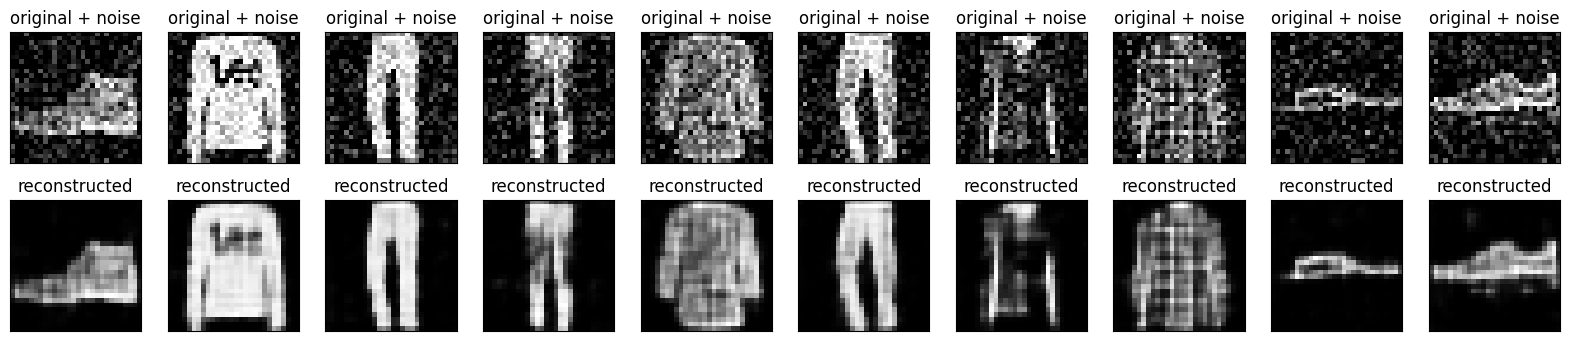

In [28]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

Third example: Anomaly detection